In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#from numpy import *
import numpy as np
%pylab inline

ImportError: No module named pandas

In [2]:
df_final = pd.read_csv('final.csv')
df_distance = pd.read_csv('distance.csv')
df_food = pd.read_csv('food.csv')
df_internal = pd.read_csv('internal.csv')

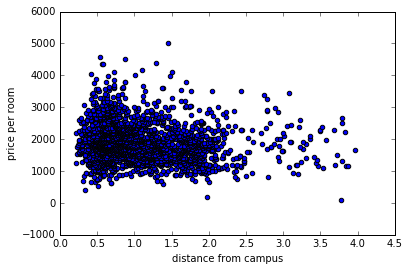

In [3]:
plt.scatter(df_distance['distance'], df_distance['price per room'])
plt.xlabel('distance from campus')
plt.ylabel('price per room')



/Users/aakashjapi/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


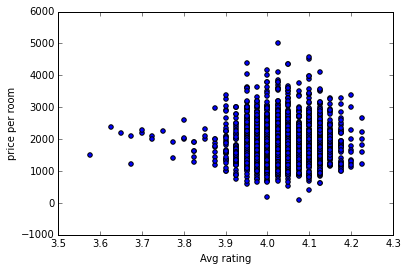

In [4]:
plt.scatter(df_final['avg_rating'], df_final['price per room'])
plt.xlabel('Avg rating')
plt.ylabel('price per room')

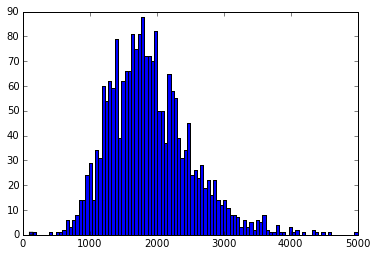

In [5]:
plt.hist(df_distance['price per room'], bins=100)[-1]
plt.show()

/Users/aakashjapi/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


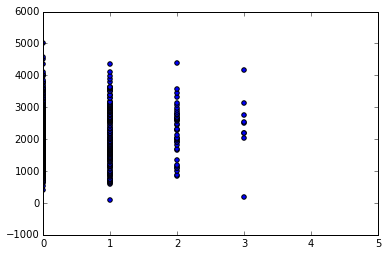

In [6]:
plt.scatter(df_final['bathrooms'], df_distance['price per room'])
plt.xlim(0,5)
plt.show()

/Users/aakashjapi/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


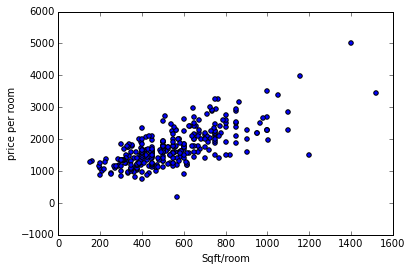

In [14]:
plt.scatter(df_internal['sqft/room'], df_internal['price per room'])
plt.xlabel('Sqft/room')
plt.ylabel('price per room')

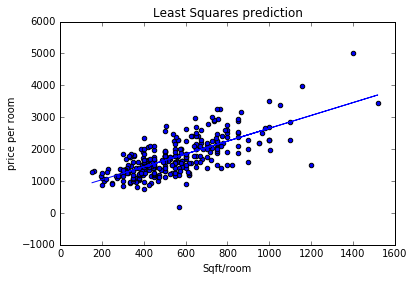

In [51]:
curr = df_internal['sqft/room'].values[np.newaxis].T
ones = np.array([1]*len(curr))[np.newaxis].T

use = np.hstack((curr, ones))
labels = df_internal['price per room'].values.T
coeffs = np.linalg.lstsq(use, labels)[0]

plt.scatter(df_internal['sqft/room'], df_internal['price per room'])
plt.plot(df_internal['sqft/room'], coeffs[0]*df_internal['sqft/room'] + coeffs[1])
plt.xlabel('Sqft/room')
plt.ylabel('price per room')
plt.title("Least Squares prediction")

In [13]:
#Top Left: 37.874185, -122.266381
#Bottom Left: 37.867816, -122.265887
#Bottom Right: 37.869671, -122.252347
#Top Right: 37.875515, -122.256821

from math import sin, cos, atan2, sqrt, degrees, radians, pi
from geopy.distance import great_circle as distance
from geopy.point import Point

top_left = Point(latitude=37.874185, longitude=-122.266381)
bot_left = Point(latitude=37.867816, longitude=-122.265887)
bot_right = Point(latitude=37.869671, longitude=-122.252347)
top_right = Point(latitude=37.875515, longitude=-122.256821)

def midpoint(a, b):
    a_lat, a_lon = radians(a.latitude), radians(a.longitude)
    b_lat, b_lon = radians(b.latitude), radians(b.longitude)
    delta_lon = b_lon - a_lon
    B_x = cos(b_lat) * cos(delta_lon)
    B_y = cos(b_lat) * sin(delta_lon)
    mid_lat = atan2(
        sin(a_lat) + sin(b_lat),
        sqrt(((cos(a_lat) + B_x)**2 + B_y**2))
    )
    mid_lon = a_lon + atan2(B_y, cos(a_lat) + B_x)
    # Normalise
    mid_lon = (mid_lon + 3*pi) % (2*pi) - pi
    return Point(latitude=degrees(mid_lat), longitude=degrees(mid_lon))

distance(midpoint(bot_left, bot_right), Point(latitude=df_final['latitude'][1331], longitude=df_final['longitude'][1331])).km


0.43698465606862397

In [11]:
df_final['edge_distance'] = pd.Series(0.0, index=df_final.index)
for i in range(len(df_final)):
    df_final['edge_distance'][i] = min([
            distance(midpoint(bot_left, bot_right), Point(latitude=df_final['latitude'][i], longitude=df_final['longitude'][i])).km,
            distance(midpoint(bot_right, top_right), Point(latitude=df_final['latitude'][i], longitude=df_final['longitude'][i])).km,
            distance(midpoint(top_left, top_right), Point(latitude=df_final['latitude'][i], longitude=df_final['longitude'][i])).km,
            distance(midpoint(top_left, bot_left), Point(latitude=df_final['latitude'][i], longitude=df_final['longitude'][i])).km
        ])


/Users/aakashjapi/HousingAnalysisDailyCal/venv/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
df_final['edge_distance'][1332]

0.73970403090827563

In [21]:
df_final.to_csv("final_edge_distance.csv")

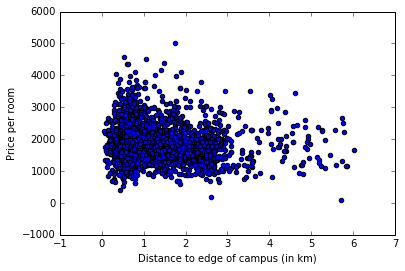

In [23]:
plt.scatter(df_final['edge_distance'], df_final['price per room'])
plt.xlabel('Distance to edge of campus (in km)')
plt.ylabel('Price per room')
plt.show()